In [2]:
!py -m pip install yellowbrick


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
print("libraries imported..")

C:\Users\User\AppData\Local\Temp\ipykernel_6992\918472875.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


libraries imported..


In [4]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#Задачи: Линейная регрессия
# 1. Разработать модель линейной регрессии, учитывающей все (в примере),2,3 столбца входных переменных. Рассчитать MSE. 
# Вывести значения коэффициентов модели.

In [6]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for i in range(1, X.shape[1] + 1):
    model = LinearRegression()
    model.fit(X_train.iloc[:, :i], y_train)
    y_pred = model.predict(X_test.iloc[:, :i])
    mse = mean_squared_error(y_test, y_pred)
    print(f'Число признаков: {i}, MSE: {mse}')
    print('Коэффициенты:', model.coef_)

Число признаков: 1, MSE: 7.513330196883473
Коэффициенты: [0.04719411]
Число признаков: 2, MSE: 1.8658242378849033
Коэффициенты: [0.04692623 0.18919339]
Число признаков: 3, MSE: 1.865277687612227
Коэффициенты: [ 0.04694174  0.18958816 -0.00069195]


In [7]:
# 2. Разработать модель линейной регрессии, базисные функции - полином от исходных значений. Найти зависимость MSE от
# максимальной степени полинома. (max_pow <= 10)

Степень полинома 1: MSE = 1.9730
Степень полинома 2: MSE = 0.2437
Степень полинома 3: MSE = 0.1789
Степень полинома 4: MSE = 0.3138
Степень полинома 5: MSE = 2.7228
Степень полинома 6: MSE = 498.4171
Степень полинома 7: MSE = 43612.0631
Степень полинома 8: MSE = 49915316.4750
Степень полинома 9: MSE = 25955735162.0759
Степень полинома 10: MSE = 66259745381.3528


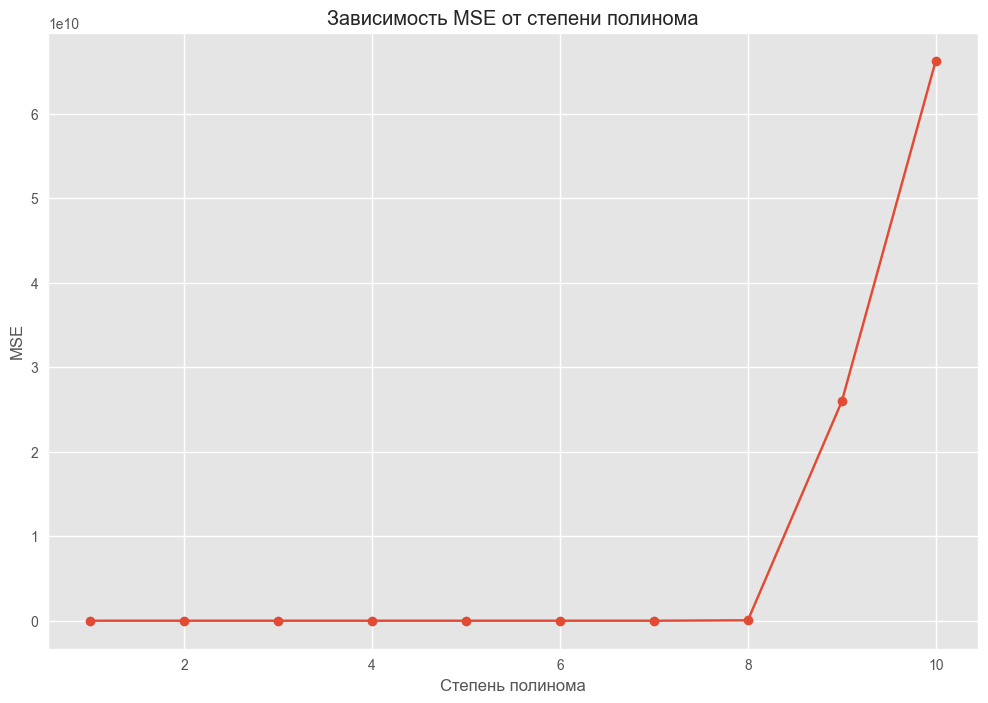

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Исследуем MSE при различных степенях полинома
max_pow = 10
mse_list = []

for degree in range(1, max_pow + 1):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    # Разделение данных
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=1)
    
    # Линейная регрессия
    lr_poly = LinearRegression()
    lr_poly.fit(X_train, y_train)

    # Предсказания и MSE
    y_pred = lr_poly.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    print(f"Степень полинома {degree}: MSE = {mse:.4f}")

# График зависимости MSE от степени полинома
plt.plot(range(1, max_pow + 1), mse_list, marker='o')
plt.xlabel('Степень полинома')
plt.ylabel('MSE')
plt.title('Зависимость MSE от степени полинома')
plt.show()


In [9]:
# 3. Регуляризация. Гребневая регрессия. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.30419e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.72897e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.29212e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.03869e-24): result may not be accurate.
  return linalg.solve(A, 

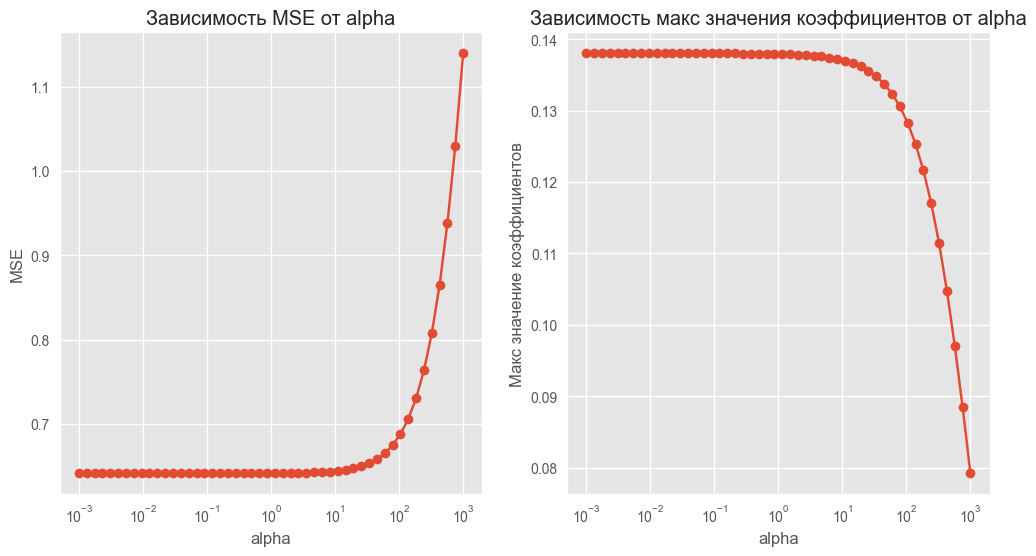

In [10]:
from sklearn.linear_model import Ridge
import numpy as np

alphas = np.logspace(-3, 3, 50)
mse_list = []
coef_max_ridge  = []

# Используем степень полинома 3
max_degree = 4
poly = PolynomialFeatures(max_degree)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    coef_max_ridge.append(np.max(np.abs(model.coef_)))

# Графики зависимости
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alphas, mse_list, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Зависимость MSE от alpha')

plt.subplot(1, 2, 2)
plt.plot(alphas, coef_max_ridge , marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Макc значение коэффициентов')
plt.title('Зависимость макс значения коэффициентов от alpha')

plt.show()

In [11]:
# 4. Регуляризация. Лассо. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# linear_model.Lasso(alpha=0.1)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.179e+01, tolerance: 4.128e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.180e+01, tolerance: 4.128e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

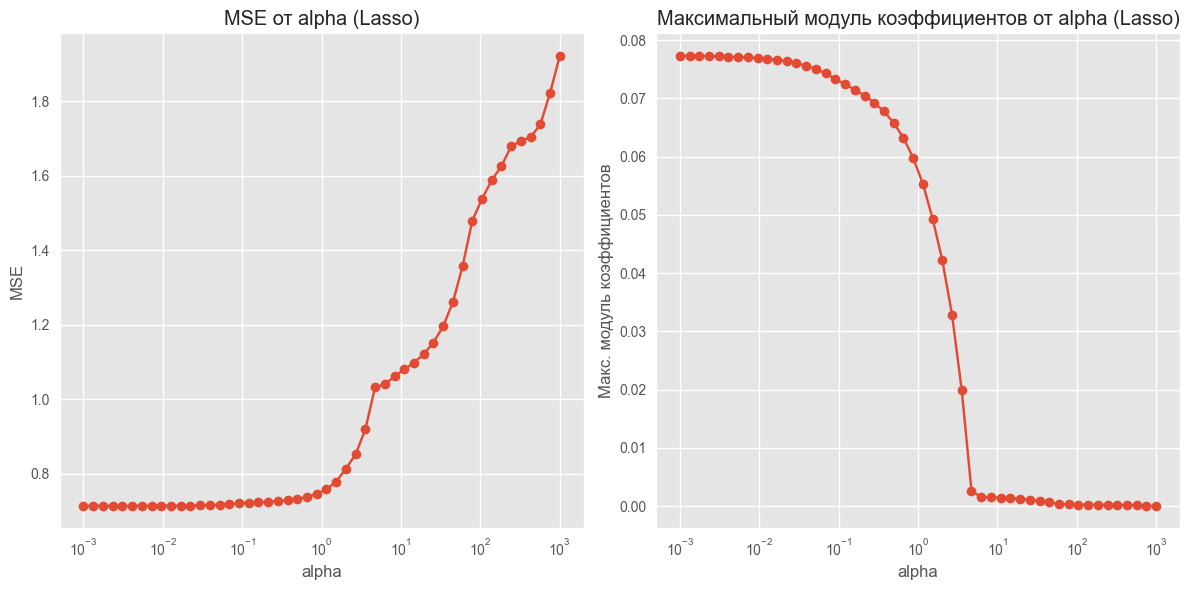

In [12]:
from sklearn.linear_model import Lasso

# Зависимость MSE и коэффициентов от alpha
mse_lasso = []
coef_max_lasso = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    
    # MSE и максимальный модуль коэффициента
    mse_lasso.append(mean_squared_error(y_test, y_pred))
    coef_max_lasso.append(np.max(np.abs(lasso.coef_)))

# Графики
plt.figure(figsize=(12, 6))

# MSE от alpha
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_lasso, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE от alpha (Lasso)')

# Коэффициенты от alpha
plt.subplot(1, 2, 2)
plt.plot(alphas, coef_max_lasso, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Макс. модуль коэффициентов')
plt.title('Максимальный модуль коэффициентов от alpha (Lasso)')

plt.tight_layout()
plt.show()

In [13]:
#SVR
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
# Исследовать точность модели регрессии при применении  ядерных функций 'poly', 'sigmoid'
# Реализовать модель SVRб учитывающую все характеристики исходных данных, выбрать модель с оптимальными параметрами.

In [14]:
from sklearn.svm import SVR

# Модели с разными ядрами
kernels = ['poly', 'sigmoid']
mse_svr = {}

for kernel in kernels:
    svr = SVR(kernel=kernel, C=100, epsilon=0.1)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    mse_svr[kernel] = mean_squared_error(y_test, y_pred)

# Результаты
for kernel, mse in mse_svr.items():
    print(f"Kernel: {kernel}, MSE: {mse}")

Kernel: poly, MSE: 18.87743332226444
Kernel: sigmoid, MSE: 375151.1931521913


In [ ]:
from sklearn.model_selection import GridSearchCV

# Параметры для подбора
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# GridSearchCV
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

# Лучшие параметры
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшее MSE: {-grid_search.best_score_}")